# Import necessary libraries + BERT

In [25]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine

from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.eval()

from sentence_transformers import SentenceTransformer
s_model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

# Load survey data

In [2]:
# Read it in
path = "../data/surveys.xlsx"
survey_32W = pd.read_excel(path, sheet_name="Survey_32W", converters={'T1':str, 'T3':str, 'T4':str}, na_filter=False)

# Drop unnecessary columns
survey_32W.drop(columns=['Unnamed: 0', 'subject_id', 'image_name', 'image_name_2'], inplace=True)

# Drop rows missing response
survey_32W = survey_32W[
    (survey_32W['T4'] != '') &
    (survey_32W['T4'] != 'None.') &
    (survey_32W['T4'] != 'none') &
    (survey_32W['T4'] != 'N/A') &
    (survey_32W['T4'] != 'No comments') &
    (survey_32W['T4'] != 'NO COMMENTS MADE') &
    (survey_32W['T4'] != 'None') &
    (survey_32W['T4'] != 'no comments') &
    (survey_32W['T4'] != 'No comments.') &
    (survey_32W['T4'] != 'I have none to make') &
    (survey_32W['T4'] != 'LEFT BLANK') &
    (survey_32W['T4'] != 'gujfujuj') &
    (survey_32W['T4'] != "I don't know any") &
    (survey_32W['T4'] != "I don't have any thing to write.") &
    (survey_32W['T4'] != 'I have nothing else to say here') &
    (survey_32W['T4'] != '[deletion][/deletion]') &
    (survey_32W['T4'] != 'None they answer themselves.') &
    (survey_32W['T4'] != '(no statement)') &
    (survey_32W['T4'] != '[unclear][/unclear]') &
    (survey_32W['T4'] != "I don't have any.") &
    (survey_32W['T4'] != '[insertion][/insertion]') &
    (survey_32W['T4'] != '---- ----') &
    (survey_32W['T4'] != 'No Comment!!!') &
    (survey_32W['T4'] != 'No quistens to be asked') &
    (survey_32W['T4'] != 'I have none.') &
    (survey_32W['T4'] != '[blank]')
]

# Reset indices
survey_32W = survey_32W.reset_index(drop=True)

# Simple keyword search

In [3]:
keywords = [
    "white",
    "whites",
    "black",
    "negro",
    "negro,",
    "negro.",
    "negroes",
    "negroes,",
    "negroes.",
    "negroes?",
    "negros",
    "negros,",
    "negros.",
    "negroe",
    "negro's",
    "colored"
    "color",
    "race",
    "races",
    "racial"
]

In [4]:
survey_32W['about_race'] = 0
for i in range(len(survey_32W['T4'])):
    for k in keywords:
        if k in survey_32W['T4'][i].lower():
            survey_32W.at[i, 'about_race'] = 1
            break

In [5]:
for r in survey_32W['T4'].loc[survey_32W['about_race'] > 0]:
    print(r,"\n")

I am not fighting to give freedom to the world. Freedom is something that must be earned. It can't be of any value when taken as a gift. I am fighting to keep America on top and to help Great Britain. If Roosevelt thinks he is going to flood this country with the scum of the world after the war he has a lesson coming. This is a white fighting Christian country and we intend to keep it that way! We earned our freedom. All help to those who want to do the same. But no lies about handing it to them - And the least Government is the best Government. 

I don't know why you put color people in this questionnaire, I figure that was just for white. 

It is a very good questionier if everyone would answer it truthful. One thing wrong it dosen't cover enough. It should be about 150 questions. As we all know the thought of two races will be for their own. If all questions were answered fairly that would be an excellant examation. 

White & negro soldiers could not live together 

This questionnai

In [6]:
for r in survey_32W['T4'].loc[survey_32W['about_race'] == 0]:
    print(r,"\n")

In reference to question #25 there is no cooperation with anybody at all including officers, NCO's & enlisted men. I know I would never come back alive if sent into combat with the company I am in now. I know it a heck of a thing to say, but it's the truth. 

Let's get something done about prosecuting the war. There are too many deserters that haven't been apprehended; & also a few draft-dodgers. And by all means strikes should be outlawed for the duration. The food is the poorest now than it has been at any time since I was inducted in 1940 

I want to say that I consider all my efforts in the Army up to this point to be almost fruitless. I might have been a far more useful person. I have had [underline] no [/underline] specialized training in any subject. This is what I want! Ive had my basic training a long time ago. But I cant seem to shake it off. It seems to follow me about. Lets get going with the war. I'm trying to forget my past. Lets get going! 

This whole army works the sam

I believe the practice of the army sending men a great distance from their homes (while in the U.S.) is wrong. If a man could get home once in a while I don't believe he would be so dissatisfied. 

I think one mistake was made by drafting men over 38 years old as it seems most medical cases were in camps and hospitals men of that age and over. They are able to do more for this war in factories and other outside jobs than to be in the army with the younger men as officers over them. They are not quick minded and have not the ability of the younger boys to grasp things and to do a job in a hurry and by that hinder the progress of the armed forces. 

IS IT FAIR FOR ANYONE TO OBTAIN A COMMISSIN IN THE ARMY BY POLITICAL INFLUENCE? 

I believe that the army would be a pretty good place if they didn't have to many recruit officers. I don't believe that a man should be an officer with out he has at least five years in the service. 

I think that all p.t. should be run by civilians an not soldi

I [deletion][/deletion] never knew what any camp was like until I entered the army & my honest opinion is that I'm very much satisfied & I hope to stay in it long enough to be able to help in any way 

I believe this questionnaire to be a very fine way to get honest opinions of Service men on their ideas & personal feelings about the Army of the United States and under whose restrictions we are now serving and far as I am concerned all Soldiers just Sow what they Reap in other words it is up to the Soldier, himself if he puts forth enough effort to do his part willingly, why he will be given a more than fair chance towards advancement and he cannot gripe if he does not, because the U.S. Army is the greatest one in the world, as to good food, plenty of recreation, and the best of clothing, what more could a man ask for as a Soldier in the time of war.  

more time off for furlough. 

I have a question that does not [unclear]cover[/unclear] this but it should be. Most of the fellows boug

I would say that it is not a question of what people think as individuals but as a united body. We must all think and act alike to get action and results. It is the too many indifferences that hold and complicate matters. Draft boards are placing men in the army who are physically unfit. Why waste money and time? A closer examination should be given than that of today. 

The army isn't so bad. It is a life that we have to get used to. The only trouble is the leaders are not on their toes. They can't make up thier [their] mind what they want you to do. They are to [too] strict on certain things which do not require all the attention they devote on it. You are not given enough time to do all the things that are required of you. 

I think this questionnaire is ment all right and I pray for complete Victory for us and the ones fighting with us.  

I haven't been in the army long enough to make very many intelligent comments, but I have one which I think is important for the moral [morale] 

Well I haven't got much to say a bout it only I will be glad when the war is over. So I can go back home & be with my baby 

I believe every married man with children should be exempt from armed service until all single men and married men without children are drafted. Also if there are several in from one family at least one boy should be permitted to remain home if the parents are aged or unable to support themselves. If the government stepped in to prevent strikes and absentism amongst the workers I'm sure the morale of the armed forces would be much better. There is no reason, only during war, why labor can't be managed similar to the army. 

Military Courts are to severe on service man, in civilian court men are inosence untill proven guilty in the Army it is entirily different. [paragraph] Let's all fight for a complete victory. "V" 

I feel that the majority of men in the U.S., if had a choice of occupation in the Army would make far better men and soldiers, their advancement wo

the army should have the best type of classification board as it would make the men like the army and work much harder at their own free will than have to be driven to do some job they hate. also should remove some of the Induction board doctors as they don't make any effort to find out if man is sick or in poor heath lot of them just rush you through they take better care of animals than do of men. because animals ar hard to get and men can be gotten so easily. [paragraph] Also some of the doctors in army should have to take an examination. [unclear]like[/unclear] given at final close of medical Studies before entering the army and should have a grade of 87 - 100 not any lower. also men should be given the right size clothing and right size of shoe. as I have seen many men wearing shoes too large or small and getting feet they could not walk on after few week in army 

Why we cant get a furlough in the 83 div. more than 6 days our eats are very poor have been for the last 3 mo. and th


I think some of the company comm, First Sergeants, and noncoms should be looked into and see how the company is operated and investigate so much partiality being shown 

I am a married man and my wife will have a baby almost any time now and I think a married man belongs on a defense job or farm so he can take care of his family and keep his mind on his work. Personally I cant keep my mind on my work the way things are. I can't do any good when I dont know how my family is and am worried all the time and have my mind on them. I have been nearly struck by trucks and automobiles on many occassions while going along thinking and worrying about my family at home. I am trying to carry on through this thing so that we may be together again soon. 

The questionnaire is quite complete, but I for one would like to hear a few of the arguments pro and con on a few of the subjects. 

well what I want to know is why dont they put the AWOL on [unclear][/unclear] Duity [Duty] or punish them more ins


I do believe that, especially a drafted man, looks forward to passes and opportunities to visit home. It should not be an issue of the whim of officers who are at the front office to decide yes or no on pass questions without learning legitimate explanations. This questionnaire is well put together & I wish it success in what it is endeavouring to accomplish 

I think this is a swell post and would rather be here than any where else . Although this is my first post I dont see where you could be treated any better there might be a lot of the boys gripe but they will find out they were on a good post 

In reference to question #7 I am in a post near to home. I have nothing to do for the entire weekend and would like to go home. But we can not unless we get weekend passes. M.P.'s watch the trains and buses and we can't leave the town even [unclear]though[/unclear] we have the weekend off. 

I think reception centers could be more careful in fitting recruits. It would save a lot of time a

# BERT keyword search

In [7]:
def get_token_embeddings(text):
    
    # Tokenize the text
    split_text = text.split(". ")
    marked_text = "[CLS] " + " [SEP] ".join(split_text) + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # Mark tokens belonging to a sentence
    segment_ids = [0]*len(tokenized_text)
    is_zero = True
    for i in range(len(tokenized_text)):
        segment_ids[i] = 0 if is_zero else 1
        if tokenized_text[i] == "[SEP]":
            is_zero = not is_zero

    # Convert to torch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segment_ids])

    # Run through BERT
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]

    # Adjust
    token_embeddings = torch.stack(hidden_states, dim=0)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    token_embeddings = token_embeddings.permute(1,0,2)

    # Get token vectors
    token_vecs_sum = []
    for token in token_embeddings:
        sum_vec = torch.sum(token[-4:], dim=0)
        token_vecs_sum.append(sum_vec)
    
    return token_vecs_sum

## Define dictionary of keywords to filter by

In [8]:
# Use keyword in a short sentence/phrase for context
# NOTE: Pre-check the tokenization of each phrase.
#       Set 'idx' to the index of the keyword in the list of tokens
keywords = [
    {"text": "The white man", "idx": 2, "embed": None},
    {"text": "The negro man", "idx": 2, "embed": None}
    #{"text": "white", "idx": 1, "embed": None},
    #{"text": "negro", "idx": 1, "embed": None}
]

for k in keywords:
    embed = get_token_embeddings(k['text'])
    k['embed'] = embed[k['idx']]

## Search responses for words similar to keywords

In [9]:
# Create new column for tracking relevant responses
survey_32W['about_race'] = 0

# For displaying matches later
token_matches = []

for i in range(len(survey_32W['T4'])):
    embed = get_token_embeddings(survey_32W['T4'][i])
    for j in range(len(embed)): # for e in len(embed)
        for k in keywords:
            sim = 1 - cosine(embed[j], k['embed'])
            if sim >= 0.5:
                survey_32W.at[i, 'about_race'] += 1
                # For displaying matches later
                split_text = survey_32W['T4'][i].split(". ")
                marked_text = "[CLS] " + " [SEP] ".join(split_text) + " [SEP]"
                tokenized_text = tokenizer.tokenize(marked_text)
                token_matches.append((tokenized_text[j], k['text']))
                break

# Display tokens that matched with a keyword
print(set(token_matches))

{('south', 'The negro man'), ('##es', 'The negro man'), ('negro', 'The negro man'), ('black', 'The white man'), ('racial', 'The white man'), ('color', 'The negro man'), ('color', 'The white man'), ('north', 'The negro man'), ('yellow', 'The white man'), ('racial', 'The negro man'), ('whites', 'The white man'), ('races', 'The negro man'), ('africa', 'The negro man'), ('slave', 'The negro man'), ('segregation', 'The negro man'), ('northern', 'The negro man'), ('blacks', 'The white man'), ('southern', 'The white man'), ('chinese', 'The white man'), ('red', 'The white man'), ('colored', 'The white man'), ('race', 'The negro man'), ('##s', 'The negro man'), ('cattle', 'The white man'), ('colored', 'The negro man'), ('south', 'The white man'), ('american', 'The negro man'), ('negro', 'The white man'), ('southern', 'The negro man'), ('white', 'The white man')}


### Categorized as "about race"

In [10]:
for r in survey_32W['T4'].loc[survey_32W['about_race'] > 0]:
    print(r,"\n")

I am not fighting to give freedom to the world. Freedom is something that must be earned. It can't be of any value when taken as a gift. I am fighting to keep America on top and to help Great Britain. If Roosevelt thinks he is going to flood this country with the scum of the world after the war he has a lesson coming. This is a white fighting Christian country and we intend to keep it that way! We earned our freedom. All help to those who want to do the same. But no lies about handing it to them - And the least Government is the best Government. 

I don't know why you put color people in this questionnaire, I figure that was just for white. 

White & negro soldiers could not live together 

We are in the wrong outfit. We are still fighting the Colored War The Yankees and the Rebels. I believe overseas it will be the same as the last was fellows being killed not seeing the enemy. 

it is all pretty covered. The food is poor sometimes & what kind of a deal did that goat ranch make you. &

#### Did not contain a keyword

In [15]:
for r in survey_32W['T4'].loc[survey_32W['about_race'] > 0]:
    if "negro" not in r and "white" not in r:
        print(r,"\n")

We are in the wrong outfit. We are still fighting the Colored War The Yankees and the Rebels. I believe overseas it will be the same as the last was fellows being killed not seeing the enemy. 

it is all pretty covered. The food is poor sometimes & what kind of a deal did that goat ranch make you. & the fishing. There's lots of cattle men in the west. sometimes the boys don't eat because the stomach will not stand - the food. & therefore they eat to much candy out of the canteen. but myself I have always eat rough food. but we do not get enough meat. & I believe we should get furloughs while we are on this side.. & the day cleaning is too high 

This questionnaire dealt with the Negroes "in part," but what about the "Chinese" question? What'll happen to China after the war + what will she gain from it? These questions should have been included. 

If I were a leader of an armed force I'd have everything balanced perfectly. I wouldn't put northerners in with an already organized southern

### Categorized as "not about race"

In [16]:
for r in survey_32W['T4'].loc[survey_32W['about_race'] == 0]:
    print(r,"\n")

In reference to question #25 there is no cooperation with anybody at all including officers, NCO's & enlisted men. I know I would never come back alive if sent into combat with the company I am in now. I know it a heck of a thing to say, but it's the truth. 

Let's get something done about prosecuting the war. There are too many deserters that haven't been apprehended; & also a few draft-dodgers. And by all means strikes should be outlawed for the duration. The food is the poorest now than it has been at any time since I was inducted in 1940 

I want to say that I consider all my efforts in the Army up to this point to be almost fruitless. I might have been a far more useful person. I have had [underline] no [/underline] specialized training in any subject. This is what I want! Ive had my basic training a long time ago. But I cant seem to shake it off. It seems to follow me about. Lets get going with the war. I'm trying to forget my past. Lets get going! 

This whole army works the sam


I do not think that it is fair to hold the soldiers of my outfit until 5 or 6 o clock on sat afternoon before giving thin a rase. I think we have been in the army long enough that we should get of at noon. We do not do any thing anyway an another thing I thing we should have at least 10 days leave befor we go across if we go at but 2 a year. other wise I like the army navy well. 

I am well sadyes fide in the army 

I thing this camp should give more passes & at best a furlough in the first six months [[paragraph]] I would like to be transfered to the Air Corps. and if I get that I would like to be in a overseas combat unit. I lon't thing we have enough training for Combat yet 

I thank we should have more passes in this camp (why) we never get of till 1700 every day and dont have time to go any place 

More [unclear][/unclear] Club [paragraph] More P.X. [Army Exchange] [paragraph] More entertainers [paragraph] More transation [transportation] to and from camp [paragraph] More theater


I joined the Army 3 1/2 years ago, used 3 of it training as a radio operator on a combat ship. And now they've put me to work as a grease monkey. Why not put me where I can apply my knowledge. I know nothing of mechanics - am not a leader of men - but I know radio.- 

Question 24- Do you usualy feel that what you are doing in te army is worthwhile or not? Concerning this question- [underline]No[/underline]- Personally I believe I would make a better soldier if I were put into a combat outfit. After being in the army for 15 months learning all the things which are essential and being trained in a [unclear]technical[/unclear] school- I believe I am better suited for a combat outfit. 

pertaining to question 30, I would rather be in an outfit that stayed in the U.S. because my job is to train personnel. I have been trained in that job by the army at quite an expense. It would be foolish to spend more money on me for additional training. Before I aquired this training I wanted to be in a 

does the regular army have six months after the war to stay in army or does he get out as soon as the war is over 

All I have to say is that the men in our outfit don't get a fair chance and there all pretty well disgusted. I'm about ready to quit right now if something don't change this outfit. We don't get treated like men. We get pushed around like a bunch of school kids. We are here for a purpose but, our outfit has officers and noncoms that are (lousy) 

I do not now very much about the Army and dont say much of it I think it is a good Army? 

If there was more cooperation among officers & NCO's we would have a better army as a hole. There is too many cutthroat tricks pulled by enlisted men striving to go higher in rank. 

All I can say it is a very good questionnaire 

Not about this particular one, but why do they discriminate the Japanese Americans. Why are they denied to fight for what any one else in the Army is fighting for. Why aren't they eligible to apply for Aviation Ca

#### Contained a keyword

In [17]:
for r in survey_32W['T4'].loc[survey_32W['about_race'] == 0]:
    if "negro" in r or "white" in r:
        print(r,"\n")

Question 58 through 63 - The negroes are alright in their place - whether its in civilian life or military - but most of them if given a few extra privileges seem to think they've been given the right to take over. They should be definitely kept separated on army posts - anyway I'm still a southerner at heart. 

most of the boys in my outfit come from where negros stay on their side of the street and they don't like them and they fight each other when they are together. I don't think they should be in the same camp together. They are giving us the same training they have been giving us for the last two years. It isn't doing us much good I don't think.  

I believe the army could be a little more careful in selecting its men for combatant service. There were many men who came into the army with Non-Combatant stamped on the top of their service record. This was of course for General Service with Non-Combatant duties. However after a white a man was either General or Limited Service. Thos

# CUR Decomposition

In [18]:
def cur(A, idx=False, SVD=None, rank=None):
    
    if SVD==None:
        SVD = np.linalg.svd(A, full_matrices=False)
    if rank==None:
        rank = np.linalg.matrix_rank(A)
    
    V,S,Wt = SVD
    
    def DEIM(M): # row/column selection method
        p = []
        p.append(np.argmax(np.abs(M[:,0]))) # row index of the largest value in the first column of M
        for i in range(1,rank):
            res = M[:,i] - np.dot(M[:,:i],np.dot(np.linalg.inv(M[:,:i][p]), M[:,i][p]))
            p.append(np.argmax(np.abs(res)))
        return p
    
    p_C = DEIM(np.transpose(Wt))
    C = A[:,p_C]
    
    p_R = DEIM(V)
    R = A[p_R]
    
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
    
    return (C,U,R, p_C, p_R) if idx else (C,U,R)

## Embed responses

In [21]:
# Group by answer choice
df_race = survey_32W[survey_32W['about_race'] > 0]
df_not_race = survey_32W[survey_32W['about_race'] == 0]

# Get long responses
res_race = df_race['T4'].tolist()
res_not_race = df_not_race['T4'].tolist()

# Embed responses, transposed so each column is one embedding
embed_race = np.transpose(s_model.encode(res_race))
embed_not_race = np.transpose(s_model.encode(res_not_race))
embed_all = np.concatenate((embed_race, embed_not_race), axis=1)

## Plot singular values

Text(0.5, 1.0, 'Singular values of matrix of long response embeddings')

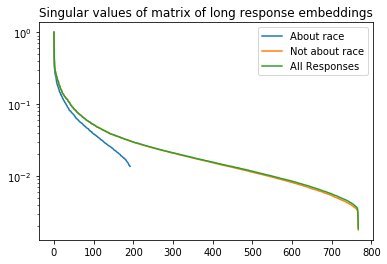

In [26]:
for A in [embed_race, embed_not_race, embed_all]:
    U,S,Vt = np.linalg.svd(A, full_matrices=False)
    S = [S[i]/S[0] for i in range(len(S))]
    plt.semilogy(S)
plt.legend(["About race", "Not about race", "All Responses"])
plt.title("Singular values of matrix of long response embeddings")

## Form a matrix of the "most important" responses

In [23]:
C_race,U_race,R_race, p_C_race, p_R_race = cur(embed_race, idx=True)
C_not_race,U_not_race,R_not_race, p_C_not_race, p_R_not_race = cur(embed_not_race, idx=True)

## Display top 20 responses from each category

In [24]:
print("About race\n\n")
for i in range(20):
    print(res_race[p_C_race[i]], '\n')
print("\nNot about race\n\n")
for i in range(20):
    print(res_not_race[p_C_not_race[i]], '\n')

About race


 The negro situation should not be as delicate as it is sometimes made. This is especially true in the army. If the negro is a soldier, and a good one at that, we should show him the respect we give to a good white soldier. If we do not use special handling with the negro he will become a better American through being accepted by us. It will probably be proven that the negro battalion now in existence is excellent. They are used to menial jobs and will be good soldiers and tough ones. Therefore, we should use the chance to get them to work together. At the same time we can fight side by side with them and still have both races become good fighting soldiers. 

About the negro why do you ask so much question about them. 

I think the negro should have his rights as long as he stays in his place. 

[unclear][/unclear] the white people in this camp don't like negroes [unclear][/unclear] 

I think a negro should have an equal Rights with white people because thats one thing we 